# Assessing Fit (Polynomial Regression)

### Imports

In [52]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

%matplotlib inline

## Polynomial Numpy Array Function
For a vector of data, create an array with columns: vector, vector^2, vector^3, ..., vector^degree

In [38]:
def polynomial_df(feature, degree):
    ''' 
    For a vector of data, 'feature' create an array with columns: feature, feature^2, feature^3, ..., feature^degree
    '''
    # assume that degree >= 1
    # initialize the array:
    poly_data = pd.DataFrame({ 'd1': feature })
    
    for d in range(2, degree + 1):
        col_name = 'd' + str(d)
        new_data = pd.DataFrame({ col_name: poly_data['d1'] ** d })
        poly_data = pd.concat([poly_data, new_data], axis = 1)

    return poly_data

In [39]:
# TEST:
feature = [0, 1, 2, 3]
degree = 4
polynomial_df(feature, degree)

,d1,d2,d3,d4
0,0,0,0,0
1,1,1,1,1
2,2,4,8,16
3,3,9,27,81


## sklearn built-in function

sklearn.preprocessing.PolynomialFeatures does essentially the same thing:

In [49]:
degree = 4
feature = np.array(feature).reshape(4, 1)
poly = PolynomialFeatures(degree)
poly.fit_transform(feature)

array([[  1.,   0.,   0.,   0.,   0.],
       [  1.,   1.,   1.,   1.,   1.],
       [  1.,   2.,   4.,   8.,  16.],
       [  1.,   3.,   9.,  27.,  81.]])

# Visualizing Polynomial Regression
### Load data

In [60]:
sales = pd.read_csv('../../../data/kc_house_data.csv')
X = sales['sqft_living'].reshape(-1, 1)
y = sales['price']

In [61]:
# Model price by sqft_living
mod_d1 = LinearRegression()
mod_d1.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [63]:
# Examine coeffs
print('Intercept: %.2f, sqft_living: %.2f' %(mod_d1.intercept_, mod_d1.coef_[0]))

Intercept: -43580.74, sqft_living: 280.62


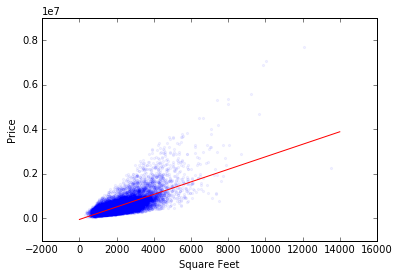

In [85]:
# Plot fit
xv = np.array(range(14000)).reshape(-1, 1)
plt.scatter(X, y, marker = '.', color = 'blue', alpha = 0.05);
plt.plot(xv, mod_d1.predict(xv), 'r-')
plt.xlabel('Square Feet');
plt.ylabel('Price');

In [86]:
# Get squared data and refit model with both features:
poly = PolynomialFeatures(2)
X2 = poly.fit_transform(X)
X2[:10, ]

array([[  1.00000000e+00,   1.18000000e+03,   1.39240000e+06],
       [  1.00000000e+00,   2.57000000e+03,   6.60490000e+06],
       [  1.00000000e+00,   7.70000000e+02,   5.92900000e+05],
       [  1.00000000e+00,   1.96000000e+03,   3.84160000e+06],
       [  1.00000000e+00,   1.68000000e+03,   2.82240000e+06],
       [  1.00000000e+00,   5.42000000e+03,   2.93764000e+07],
       [  1.00000000e+00,   1.71500000e+03,   2.94122500e+06],
       [  1.00000000e+00,   1.06000000e+03,   1.12360000e+06],
       [  1.00000000e+00,   1.78000000e+03,   3.16840000e+06],
       [  1.00000000e+00,   1.89000000e+03,   3.57210000e+06]])

In [87]:
mod_d2 = LinearRegression()
mod_d2.fit(X2, y)

# Examine coeffs
print('Intercept: %.2f, sfl: %.2f, slf^2: %.2f'%(mod_d2.intercept_, mod_d2.coef_[1], mod_d2.coef_[2]))

Intercept: 199222.28, sfl: 67.99, slf^2: 0.04


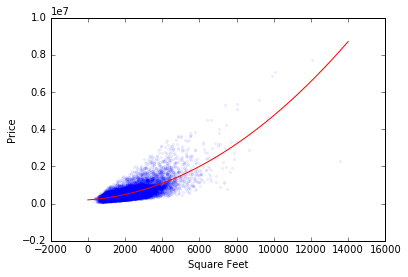

In [91]:
# Plot fit
xv2 = poly.fit_transform(xv)
plt.scatter(X, y, marker = '.', color = 'blue', alpha = 0.05);
plt.plot(xv, mod_d2.predict(xv2), 'r-');
plt.xlabel('Square Feet');
plt.ylabel('Price');